In [2]:
from scipy.stats import norm, genextreme, lognorm, truncnorm
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import gaussian_kde
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import StadiaMapsTiles
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from src.loading_data.get_data import load_cv_data

2024-10-01 07:30:30.527917: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 07:30:30.530164: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 07:30:30.561324: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-01 07:30:53.194053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


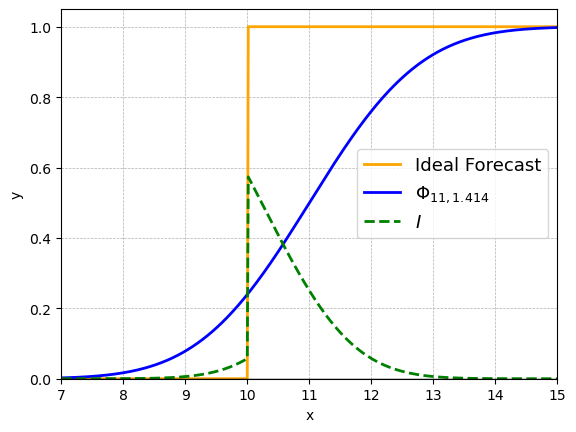

In [23]:
x = np.linspace(7, 15, 500)

observation = 10
mean_forecast = 11

indicator = np.where(x > observation, 1, 0)

mean = mean_forecast
variance = 2
gaussian_cdf = norm.cdf(x, loc=mean, scale=np.sqrt(variance))

plt.plot(x, indicator, label=r'Ideal Forecast', color='orange', linewidth=2)
plt.plot(x, gaussian_cdf, label=r'$\Phi_{11,1.414}$', color='blue', linewidth=2)
plt.plot(x, (indicator - gaussian_cdf) ** 2, label=r'$I$', color='green', linewidth=2, linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim(7, 15)
plt.ylim(0,1.05)
# Adding legend
plt.legend(fontsize=13)

# Display the plot
plt.show()

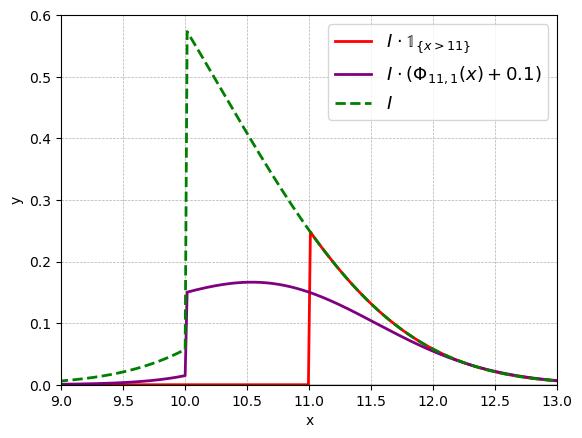

In [24]:
I = (gaussian_cdf - indicator) ** 2

I_ind = np.where(x > 11, 1, 0) * I
I_gauss = I * (norm.cdf(x, loc=11, scale=1) + 0.1)

plt.plot(x, I_ind, label=r'$I^{} \cdot \mathbb{1}_{\{x > 11\}}$', color='red', linewidth=2, linestyle='-')
plt.plot(x, I_gauss, label=r'$I^{} \cdot (\Phi_{11,1}(x) + 0.1)$', color='purple', linewidth=2)
plt.plot(x, I, label=r'$I^{}$' , color='green', linewidth=2, linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim(9, 13)
plt.ylim(0,0.6)
plt.legend(fontsize=13)

plt.show()

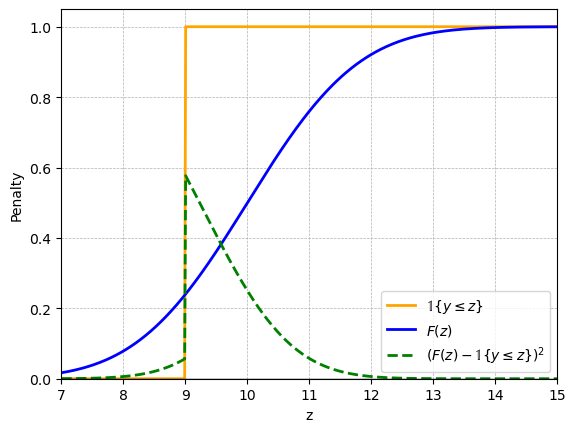

In [56]:
x = np.linspace(7, 15, 500)

observation = 9
mean_forecast = 10

indicator = np.where(x > observation, 1, 0)

mean = mean_forecast
variance = 2
gaussian_cdf = norm.cdf(x, loc=mean, scale=np.sqrt(variance))

plt.plot(x, indicator, label=r'$\mathbb{1}\{y \leq z\}$', color='orange', linewidth=2)
plt.plot(x, gaussian_cdf, label=r'$F(z)$', color='blue', linewidth=2)
plt.plot(x, (indicator - gaussian_cdf) ** 2, label=r'$(F(z) - \mathbb{1}\{y \leq z\})^2$', color='green', linewidth=2, linestyle='--')

plt.xlabel('z')
plt.ylabel('Penalty')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim(7, 15)
plt.ylim(0,1.05)
plt.legend()

plt.show()


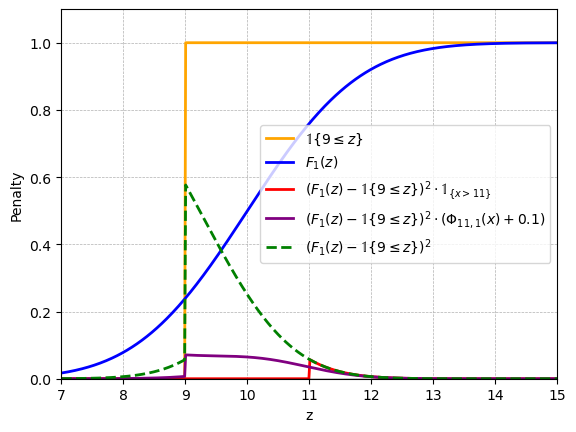

In [59]:
I = (gaussian_cdf - indicator) ** 2

I_ind = np.where(x > 11, 1, 0) * I
I_gauss = I * (norm.cdf(x, loc=11, scale=1) + 0.1)

plt.plot(x, indicator, label=r'$\mathbb{1}\{9 \leq z\}$', color='orange', linewidth=2)
plt.plot(x, gaussian_cdf, label=r'$F_1(z)$', color='blue', linewidth=2)


plt.plot(x, I_ind, label=r'$(F_1(z) - \mathbb{1}\{9 \leq z\})^2 \cdot \mathbb{1}_{\{x > 11\}}$', color='red', linewidth=2, linestyle='-')
plt.plot(x, I_gauss, label=r'$(F_1(z) - \mathbb{1}\{9 \leq z\})^2 \cdot (\Phi_{11,1}(x) + 0.1)$', color='purple', linewidth=2)
plt.plot(x, I, label=r'$(F_1(z) - \mathbb{1}\{9 \leq z\})^2$' , color='green', linewidth=2, linestyle='--')

plt.xlabel('z')
plt.ylabel('Penalty')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim(7, 15)
plt.ylim(0,1.1)
plt.legend()

plt.show()

In [44]:
all_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

location_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

features_names_dict = {name: 1 for name in all_features}

features_names_dict['wind_speed'] = 15

ignore = ['229', '285', '323']

In [51]:
train_data1, test_data1, ignore = load_cv_data(1, features_names_dict)

train_data2, test_data2, ignore = load_cv_data(2, features_names_dict)

train_data3, test_data3, ignore = load_cv_data(3, features_names_dict)

train_data0, test_data0, ignore = load_cv_data(0, features_names_dict)

In [39]:
test_data1 = test_data1.batch(test_data1.cardinality())

test_data2 = test_data2.batch(test_data2.cardinality())

test_data3 = test_data3.batch(test_data3.cardinality())

In [43]:
X, y = next(iter(test_data0))
forecasts = X['wind_speed_forecast']

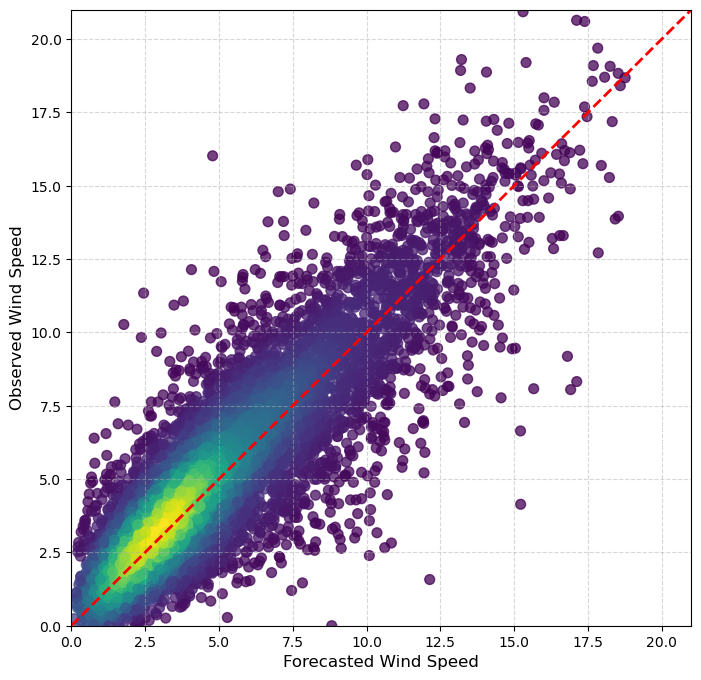

In [54]:
xy = np.vstack([forecasts, y])
z = gaussian_kde(xy)(xy)

plt.figure(figsize=(8, 8))
plt.grid(linestyle='--', alpha=0.5)

scatter = plt.scatter(forecasts, y, c=z, s=50, cmap='viridis', alpha=0.75)

#plt.colorbar(scatter, label='Density')

plt.xlabel("Forecasted Wind Speed", fontsize=12)
plt.ylabel("Observed Wind Speed", fontsize=12)
plt.xlim(0,21)
plt.ylim(0,21)
plt.plot()
plt.plot([0, 100], [0, 100], 'r--', label='y=x', linewidth=2)
# Show plot
plt.show()

In [52]:
train_data0 = train_data0.batch(train_data0.cardinality())

X, y = next(iter(train_data0))

y = y.numpy()

In [53]:
print(y)

[14.27    13.53    11.85    ... 10.29    10.92411  7.34   ]


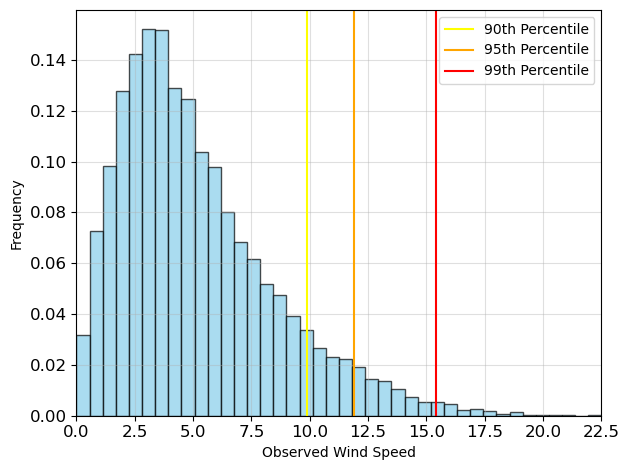

In [67]:
plt.hist(y, bins=40, color='skyblue', edgecolor='black', alpha=0.7,density=True)  
plt.xlabel('Observed Wind Speed')
plt.ylabel('Frequency')

plt.grid(alpha=0.4)  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, y.max())
plt.axvline(x=9.87, label='90th Percentile', color='yellow')
plt.axvline(x=11.88, label='95th Percentile', color='orange')
plt.axvline(x=15.43, label='99th Percentile', color='Red')

plt.tight_layout()  
plt.legend()
plt.show()

In [16]:
print(np.mean(y))
print(np.quantile(y, 0.9))
print(np.quantile(y, 0.95))
print(np.quantile(y, 0.99))

5.365722
10.289999961853027
12.210000038146973
15.4399995803833


In [2]:
filename = '/net/pc200239/nobackup/users/hakvoort/station_info.pkl'
with open(filename, 'rb') as f:
    info = pickle.load(f)

In [3]:
lat_lons = []
codes = []
for key in info:
    lat = info[key].latitude
    lon = info[key].longitude
    lat_lons.append((lat, lon))
    codes.append(info[key].code)

In [4]:
print(codes)


['251', '235', '356', '350', '242', '343', '319', '313', '344', '258', '260', '310', '215', '275', '290', '286', '249', '330', '269', '370', '209', '270', '285', '377', '375', '315', '280', '340', '391', '279', '323', '273', '248', '225', '308', '324', '278', '283', '267', '348', '316', '229', '240', '312', '277', '331', '380']


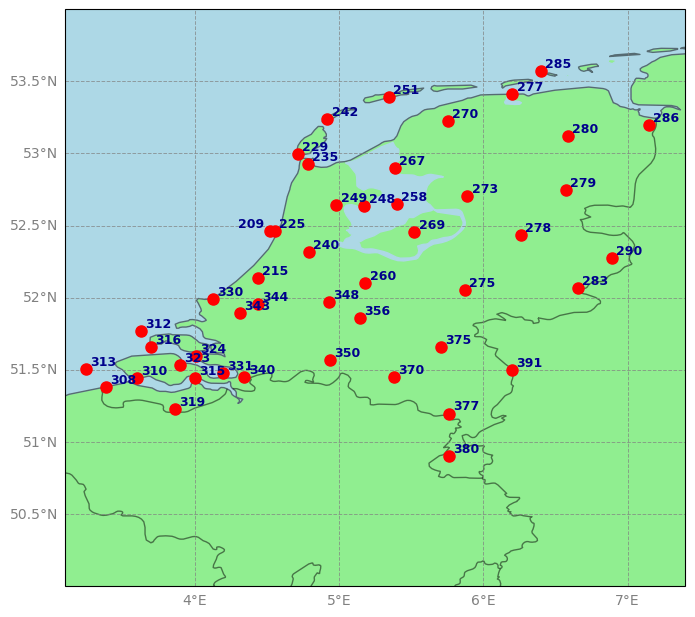

In [5]:

xmin, xmax = 3.1, 7.4
ymin, ymax = 50.0, 54.0

aspect_ratio = (ymax - ymin) / (xmax - xmin)

plt.figure(figsize=(8, 12))  
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, color='lightgreen', zorder=-1)
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')
#ax.add_feature(cfeature.RIVERS, color='blue', alpha=0.5)

gl = ax.gridlines(draw_labels=True, linewidth=0.7, color='gray', alpha=0.7, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}

for i, (lat, lon) in enumerate(lat_lons):
    if codes[i] == '209':
        lat209 = lat
        lon209 = lon
        continue
    ax.plot(lon, lat, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
    ax.text(lon + 0.03, lat + 0.05, codes[i], fontsize=9, fontweight='bold', 
            ha='left', va='center', color='darkblue', transform=ccrs.PlateCarree())

ax.plot(lon209, lat209, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
ax.text(lon209 - 0.22, lat209 + 0.05, '209', fontsize=9, fontweight='bold', 
        ha='left', va='center', color='darkblue', transform=ccrs.PlateCarree())

ax.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())

plt.show()

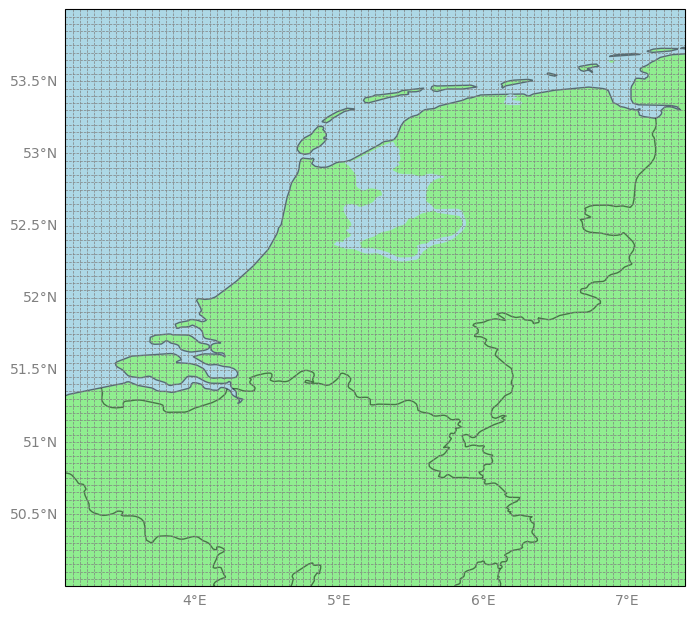

In [23]:
# Boundaries to zoom in
xmin, xmax = 3.1, 7.4
ymin, ymax = 50.0, 54.0

aspect_ratio = (ymax - ymin) / (xmax - xmin)

plt.figure(figsize=(8, 12))  # Adjust figure size based on aspect ratio
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, color='lightgreen', zorder=-1)
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

grid_spacing = 0.05

lat_grid = np.arange(ymin, ymax, grid_spacing)
lon_grid = np.arange(xmin, xmax, grid_spacing)

for lat in lat_grid:
    ax.plot([xmin, xmax], [lat, lat], color='gray', linestyle='--', linewidth=0.5, transform=ccrs.PlateCarree())

for lon in lon_grid:
    ax.plot([lon, lon], [ymin, ymax], color='gray', linestyle='--', linewidth=0.5, transform=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True, linewidth=0.7, color='gray', alpha=0.0, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}

for i, (lat, lon) in enumerate(lat_lons):
    # Ensure the point is within the specified extent
    if xmin <= lon <= xmax and ymin <= lat <= ymax:
        if codes[i] == '209':
            lat209 = lat
            lon209 = lon
            continue
        else:
            twtw = 1
            # ax.plot(lon, lat, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
            # ax.text(lon + 0.03, lat + 0.05, codes[i], fontsize=9, fontweight='bold', 
            #         ha='left', va='center', color='darkblue', transform=ccrs.PlateCarree())

# ax.plot(lon209, lat209, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
# ax.text(lon209 - 0.22, lat209 + 0.05, '209', fontsize=9, fontweight='bold', 
#         ha='left', va='center', color='darkblue', transform=ccrs.PlateCarree())

ax.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())

plt.show()

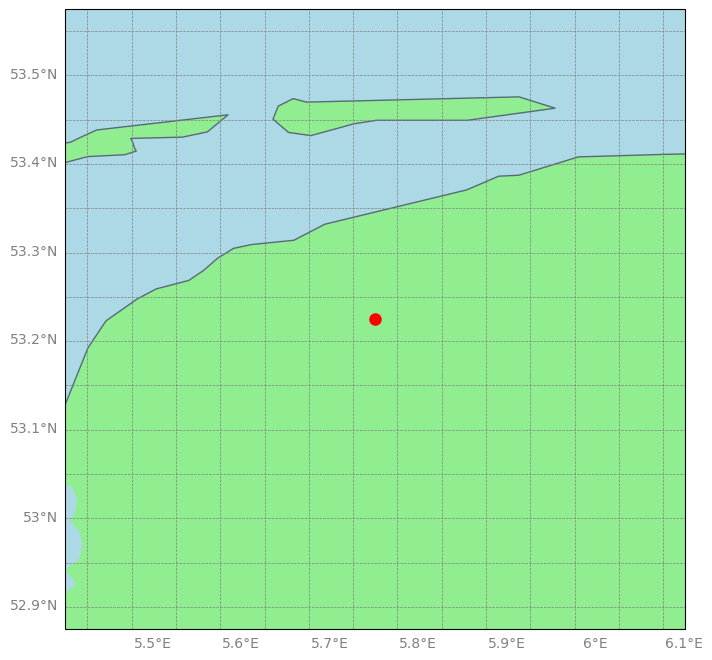

In [21]:
mycode = '270'

index = codes.index(mycode)

lat_zoom, lon_zoom = lat_lons[index]  

box_size = 0.35
xmin, xmax = lon_zoom - box_size, lon_zoom + box_size
ymin, ymax = lat_zoom - box_size, lat_zoom + box_size

aspect_ratio = (ymax - ymin) / (xmax - xmin)

plt.figure(figsize=(8, 12))  
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, color='lightgreen', zorder=-1)
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

grid_spacing = 0.05
shift = 0.025

lat_grid = np.arange(ymin + shift, ymax + shift, grid_spacing)
lon_grid = np.arange(xmin + shift, xmax + shift, grid_spacing)

for lat in lat_grid:
    ax.plot([xmin, xmax], [lat, lat], color='gray', linestyle='--', linewidth=0.5, transform=ccrs.PlateCarree())

for lon in lon_grid:
    ax.plot([lon, lon], [ymin, ymax], color='gray', linestyle='--', linewidth=0.5, transform=ccrs.PlateCarree())

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=0.7, color='gray', alpha=0.0, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}

for i, (lat, lon) in enumerate(lat_lons):
    if xmin <= lon <= xmax and ymin <= lat <= ymax:
        if codes[i] == '209':
            lat209 = lat
            lon209 = lon
            continue
        elif codes[i] == '251':
            lat_zoom = lat
            lon_zoom = lon
            ax.plot(lon_zoom, lat_zoom, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
            # ax.text(lon_zoom + 0.03, lat_zoom + 0.05, '251', fontsize=9, fontweight='bold',
            #         ha='left', va='center', color='darkblue', transform=ccrs.PlateCarree())
        else:
            ax.plot(lon, lat, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
            # ax.text(lon + 0.03, lat + 0.05, codes[i], fontsize=9, fontweight='bold', 
            #         ha='left', va='center', color='darkblue', transform=ccrs.PlateCarree())

# Plot station 209 as before
# ax.plot(lon209, lat209, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
# ax.text(lon209 - 0.22, lat209 + 0.05, '209', fontsize=9, fontweight='bold', 
#         ha='left', va='center', color='darkblue', transform=ccrs.PlateCarree())

# Set the extent to zoom into the 20x20 box around station 251
ax.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())

plt.show()

GEV (shape=0.5): mean=6.544907701811032, variance=inf


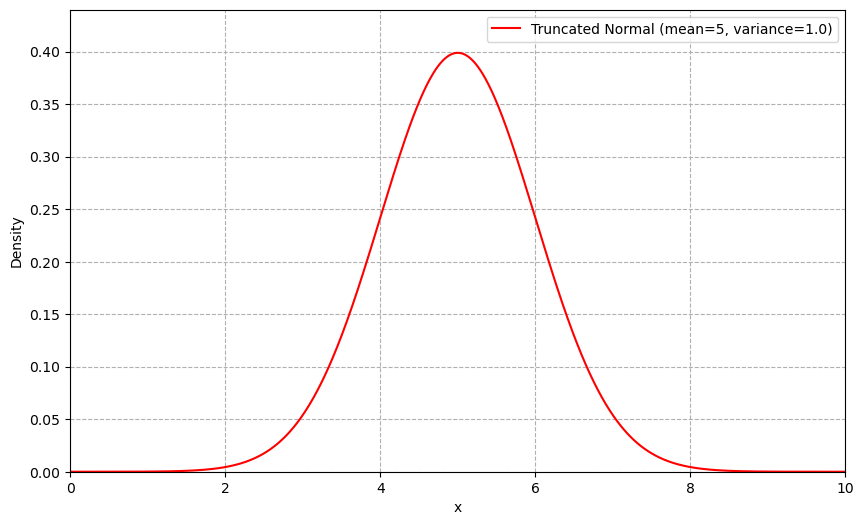

In [18]:
mean = 5
variance = 1
stddev = np.sqrt(variance)

x = np.linspace(0, 10, 1000)

mu_ln = np.log(mean**2 / np.sqrt(variance + mean**2))
sigma_ln = np.sqrt(np.log(1 + variance / mean**2))
ln_pdf = lognorm.pdf(x, s=sigma_ln, scale=np.exp(mu_ln))

shape_gev = 0.5
loc_gev, scale_gev = mean, stddev  
gev_pdf = genextreme.pdf(x, c=-shape_gev, loc=loc_gev, scale=scale_gev)

gev_mean = genextreme.mean(c=-shape_gev, loc=loc_gev, scale=scale_gev)
gev_var = genextreme.var(c=-shape_gev, loc=loc_gev, scale=scale_gev)
print(f"GEV (shape={shape_gev}): mean={gev_mean}, variance={gev_var}")

a, b = 0, 100 
mu_tn, sigma_tn = mean, stddev  
tn_pdf = truncnorm.pdf(x, (a - mu_tn) / sigma_tn, (b - mu_tn) / sigma_tn, loc=mu_tn, scale=sigma_tn)

plt.figure(figsize=(10, 6))

#plt.plot(x, gev_pdf, label=f'GEV (shape={shape_gev}, loc={loc_gev}, scale={scale_gev})', color='green')

#plt.plot(x, ln_pdf, label=f'Log-Normal (mean=5.0, variance=1.0)', color='blue')

plt.plot(x, tn_pdf, label=f'Truncated Normal (mean={mu_tn}, variance={sigma_tn})', color='red')

# Add titles and labels
plt.xlabel('x')
plt.ylabel('Density')
plt.xlim(0, 10)
plt.ylim(0,0.44)
# Add legend
plt.legend()

# Show the plot
plt.grid(True, linestyle='--')
plt.show()

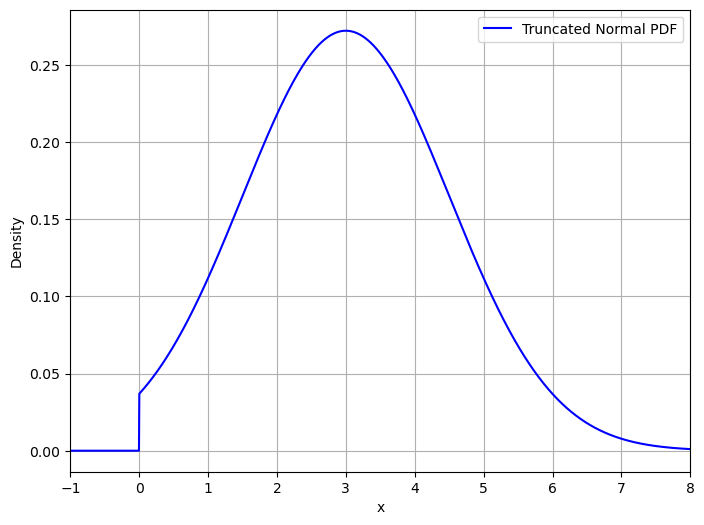

In [7]:
mu = 3      
sigma = 1.5  
lower, upper = 0, 100  

x = np.linspace(-2, 50, 10000)
trunc_normal = truncnorm.pdf(x, (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

plt.figure(figsize=(8, 6))
plt.plot(x, trunc_normal, label='Truncated Normal PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Density')
plt.xlim(-1, 8)
plt.grid(True)
plt.legend()
plt.show()

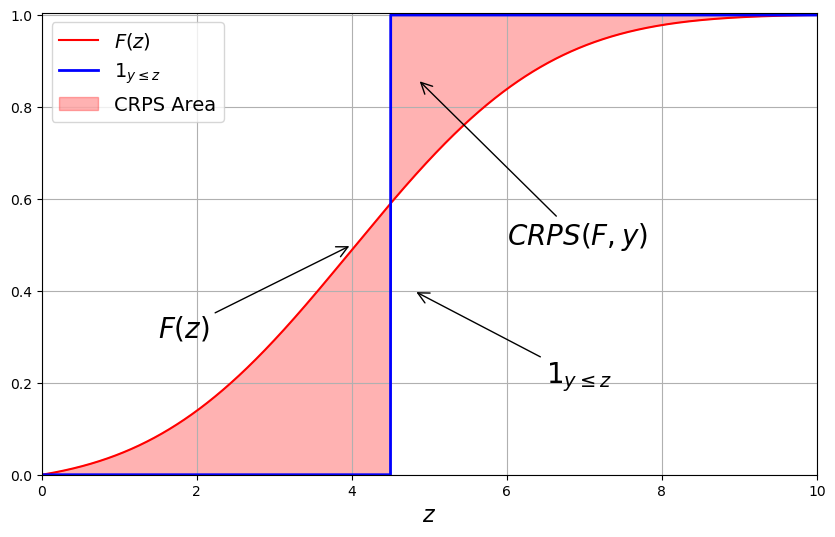

In [71]:

def truncated_normal_cdf(x, mu, sigma, lower, upper):
    return truncnorm.cdf(x, (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

def plot_crps(mu, sigma, lower, upper, y):
    x = np.linspace(lower - 1, upper + 1, 10000)

    F_x = truncated_normal_cdf(x, mu, sigma, lower, upper)

    step_function = np.heaviside(x - y, 1)

    plt.figure(figsize=(10, 6))
    plt.plot(x, F_x, color='red', label=r'$F(z)$')
    
    plt.plot(x, step_function, color='blue', label=r'$1_{y \leq z}$', linewidth=2)

    plt.fill_between(x, F_x, step_function, color='red', alpha=0.3, label='CRPS Area')

    plt.xlabel(r'$z$', fontsize=16)
    # plt.ylabel(r'$F(x)$ or $1_{x \geq y}$', fontsize=16)
    
    plt.annotate(r'$CRPS(F, y)$', xy=(y + 0.35, 0.86), xytext=(y + 1.5, 0.5), 
                 arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=20)

    plt.annotate(r'$F(z)$', xy=(mu , 0.5), xytext=(mu - 2.5, 0.3), 
                 arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=20)
    
    plt.annotate(r'$1_{y \leq z}$', xy=(y + 0.3, 0.4), xytext=(y + 2, 0.2), 
                 arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=20)

    plt.grid(True)
    plt.legend(fontsize=14)
    plt.ylim(0,1.005)
    plt.xlim(0,10)
    plt.show()

mu = 4      
sigma = 2   
lower, upper = 0, 10  
y = 4.5    

plot_crps(mu, sigma, lower, upper, y)


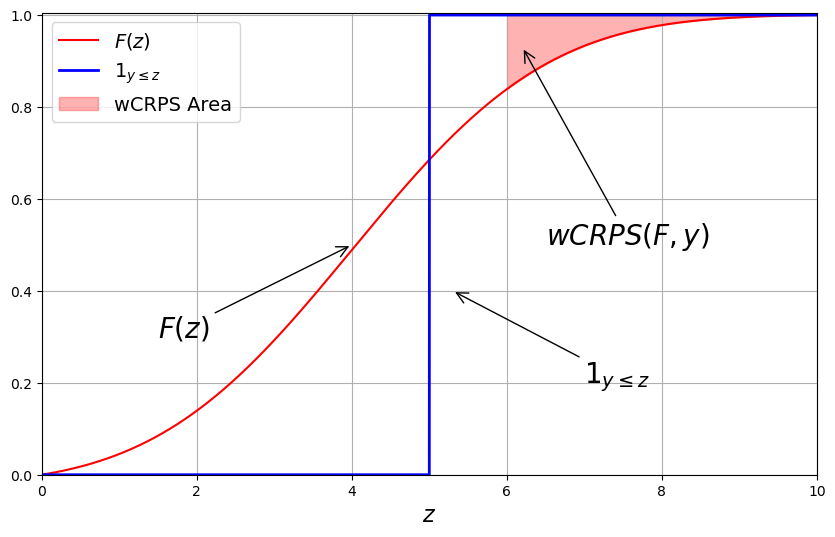

In [20]:
def truncated_normal_cdf(x, mu, sigma, lower, upper):
    return truncnorm.cdf(x, (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

def plot_crps(mu, sigma, lower, upper, y):
    x = np.linspace(lower - 1, upper + 1, 10000)

    F_x = truncated_normal_cdf(x, mu, sigma, lower, upper)

    step_function = np.heaviside(x - y, 1)

    plt.figure(figsize=(10, 6))
    plt.plot(x, F_x, color='red', label=r'$F(z)$')
    
    plt.plot(x, step_function, color='blue', label=r'$1_{y \leq z}$', linewidth=2)

    mask = x > 6
    plt.fill_between(x[mask], F_x[mask], step_function[mask], color='red', alpha=0.3, label='wCRPS Area')

    plt.xlabel(r'$z$', fontsize=16)
    
    plt.annotate(r'$wCRPS(F, y)$', xy=(y + 1.2, 0.93), xytext=(y + 1.5, 0.5), 
                 arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=20)

    plt.annotate(r'$F(z)$', xy=(mu, 0.5), xytext=(mu - 2.5, 0.3), 
                 arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=20)

    plt.annotate(r'$1_{y \leq z}$', xy=(y + 0.3, 0.4), xytext=(y + 2, 0.2), 
                 arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=20)

    plt.grid(True)
    plt.legend(fontsize=14)
    plt.ylim(0, 1.005)
    plt.xlim(0, 10)
    plt.show()

mu = 4     
sigma = 2   
lower, upper = 0, 10 
y = 5       


plot_crps(mu, sigma, lower, upper, y)